# Supervised Learning - Building a Student Performace Prediction System


# Classification vs. Regression
The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?
Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

# Logistic Regression

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance

# Question 1 - Exploring the Data (0.5 points)
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [194]:
import pandas as pd
import numpy as np

df=pd.read_csv("students-data.csv",delimiter=";")
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [195]:
df.shape

(395, 33)

In [196]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

# Question 2 - drop missing values (0.5 points)
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*
*Use .dropna() function to drop the NAs*

#### Answer:

In [197]:
df.index

RangeIndex(start=0, stop=395, step=1)

In [198]:
df.index.name= 'number'
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19


In [199]:
df.dropna()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19


# Transform Data

## Question 3 (0.5 points)

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [200]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [201]:
df.select_dtypes(include=['object'],exclude=['int64'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
5,GP,M,U,LE3,T,services,other,reputation,mother,no,yes,yes,yes,yes,yes,yes,no
6,GP,M,U,LE3,T,other,other,home,mother,no,no,no,no,yes,yes,yes,no
7,GP,F,U,GT3,A,other,teacher,home,mother,yes,yes,no,no,yes,yes,no,no
8,GP,M,U,LE3,A,services,other,home,mother,no,yes,yes,no,yes,yes,yes,no


In [202]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


# Question 4 - Drop variables with less variance (0.5 points)

*Find the variance of each numerical independent variable and drop whose variance is less than 1. Use .var function to check the variance*

In [203]:
df.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [204]:
cols=df.var()<1
npcols=cols.index[cols==True]
npcols

Index(['traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'Dalc'], dtype='object')

In [205]:
df=df.drop(npcols,axis=1)

In [206]:
df.var()


age          1.628285
Medu         1.198445
Fedu         1.184180
goout        1.239388
Walc         1.658678
health       1.932944
absences    64.049541
G1          11.017053
G2          14.148917
G3          20.989616
dtype: float64

In [207]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,yes,no,2,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,yes,no,4,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,yes,no,no,4,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,yes,no,2,1,1,0,16,18,19


#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

# Question 6 - Encode all categorical variables to numerical (0.5 points)

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [208]:
df.head()



,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10


In [214]:
category_cols=df.select_dtypes(include=['object'],exclude=['int64']).columns

In [215]:
category_cols

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [216]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

for index in category_cols:
    df[index] = enc.fit_transform(df[index])
    #print(index)
        

In [217]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10
5,0,1,16,1,1,1,4,3,3,2,...,1,1,0,2,2,5,10,15,15,15
6,0,1,16,1,1,1,2,2,2,2,...,1,1,0,4,1,3,0,12,12,11
7,0,0,17,1,0,0,4,4,2,4,...,1,0,0,4,1,1,6,6,5,6
8,0,1,15,1,1,0,3,2,3,2,...,1,1,0,2,1,1,0,16,18,19


# Question 7 - Convert the continuous values of grades into classes (1 point)

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [218]:
threshold=10

In [220]:
df['G1'] = np.where(df['G1'] > threshold, 1,0).astype(int)

In [221]:
df['G1']

number
0      0
1      0
2      0
3      1
4      0
5      1
6      1
7      0
8      1
9      1
10     0
11     0
12     1
13     0
14     1
15     1
16     1
17     0
18     0
19     0
20     1
21     1
22     1
23     1
24     0
25     0
26     1
27     1
28     1
29     0
      ..
365    0
366    1
367    0
368    1
369    1
370    0
371    1
372    1
373    0
374    1
375    0
376    1
377    0
378    1
379    0
380    1
381    0
382    1
383    0
384    0
385    0
386    0
387    0
388    0
389    0
390    0
391    1
392    0
393    1
394    0
Name: G1, Length: 395, dtype: int32

In [222]:
df['G2'] = np.where(df['G2'] > threshold, 1,0).astype(int)

In [223]:
df['G3'] = np.where(df['G3'] > threshold, 1,0).astype(int)

# Question 8 (0.5 points)

*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate feature and target attributes into separate dataframes with X and y variable names.*

In [230]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'goout',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [227]:
Y=pd.DataFrame(df[['G3']])
X=pd.DataFrame(df[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'goout',
       'Walc', 'health', 'absences', 'G1', 'G2']])

In [231]:
X.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,1,0,0,4,1,3,6,0,0
1,0,0,17,1,0,1,1,1,0,2,...,0,1,1,0,3,1,3,4,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,1,0,2,3,3,10,0,0
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,1,2,1,5,2,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,1,0,0,2,2,5,4,0,0


In [232]:
Y.head(5)

,G3
number,
0,0
1,0
2,0
3,1
4,0


# Question 9 - Training and testing data split (0.5 points)

# *So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [235]:

from sklearn.model_selection import train_test_split 

X_train, X_test,y_train, y_test = train_test_split( X,Y,train_size=300/395,random_state=0)

C:\Users\vs104709\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [238]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(300, 26)
(300, 1)
(95, 26)
(95, 1)


# Question 10 - Model Implementation and Testing the Accuracy (0.5 points)

*Build a **LogisticRegression** classifier using **fit()** functions in sklearn. 
* You need to import both Logistic regression and accuracy score from sklearn*
#### Answer:

In [239]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train)

C:\Users\vs104709\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vs104709\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [241]:
clf.predict(X_test)

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0])

In [243]:
import numpy as np
from sklearn.metrics import accuracy_score
accuracy_score(y_test,clf.predict(X_test))


0.9157894736842105

# Question 11 - Print the intercept of the Logistic regression model (0.5 points)

The value of the intercepts are stored in the model itself. You can use .intercept_ function to do the same

In [246]:
clf.intercept_

array([0.27602091])

# Question 12 - Print the coefficients of the model (0.5 points) and name the coefficient which has the highest impact on the dependent variable (0.5 points)

Hint: Use .coef_ to get the coefficients and use pd.Dataframe to store the coefficients in a dataframe with column names same as the independent variable dataframe

In [250]:
df_coeff= pd.DataFrame(clf.coef_)

In [253]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'goout',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [254]:
df_coeff.columns=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'goout',
       'Walc', 'health', 'absences', 'G1', 'G2']

In [260]:
df_coeff.transpose()

,0
school,-1.110962
sex,0.007691
age,-0.122857
address,0.353156
famsize,-0.101878
Pstatus,-0.443720
Medu,0.148267
Fedu,0.066168
Mjob,-0.025939
Fjob,-0.142159


In [ ]:
## The coefficient for parameter G2 has the highest impact on the dependent variable. 

# Question 13 - Predict the dependent variable for both training and test dataset (0.5 points)

Accuracy score() should help you to print the accuracies

In [300]:
X_train

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2
number,,,,,,,,,,,,,,,,,,,,,
63,0,0,16,1,0,1,4,3,4,1,...,1,1,1,0,4,4,4,2,0,0
245,0,1,16,1,0,1,2,1,2,2,...,1,1,1,0,3,1,4,6,1,1
154,0,0,17,1,0,1,4,4,2,4,...,1,1,0,1,1,1,4,0,1,1
311,0,0,19,1,0,1,2,1,0,2,...,1,0,1,1,1,1,2,20,1,1
81,0,1,15,1,0,1,2,3,2,2,...,0,1,1,0,2,2,5,4,1,0
344,0,0,18,1,0,1,2,3,0,2,...,1,1,1,0,3,2,3,4,1,0
336,0,0,19,0,0,0,3,1,3,0,...,1,1,0,0,3,2,5,12,1,1
124,0,0,16,1,0,1,2,2,2,2,...,1,1,1,1,4,1,5,0,0,0
250,0,1,18,1,0,1,3,2,3,2,...,1,0,1,0,5,4,5,0,0,0


In [276]:
clf.predict(X_train)

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

In [302]:
y_pred= pd.DataFrame(clf.predict(X_test),index=X_test.index)

In [303]:
y_pred

,0
number,
329,1
318,1
317,0
65,1
59,1
287,1
212,1
60,0
394,0


In [293]:
import matplotlib.pyplot as plt  

In [304]:

df_test_pred=y_test
df_test_pred=df_test_pred.join(y_pred,on=y_pred.index,rsuffix=' predicted')

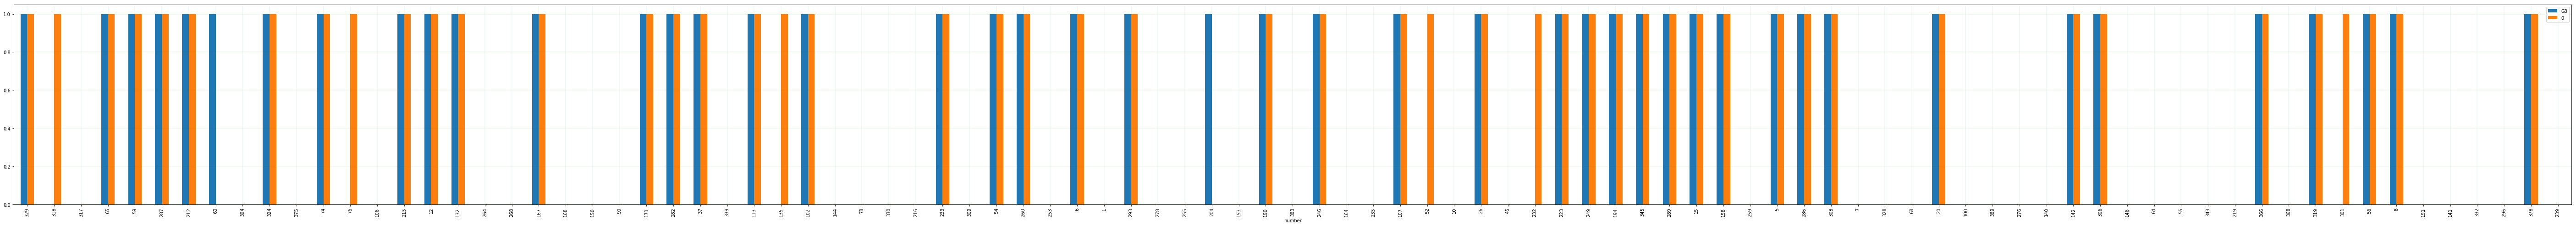

In [305]:
df_test_pred.plot(kind='bar',figsize=(100,8))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.1', color='black')
plt.show()

# Information about the dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

Attribute Information
1. ID - ID number of the image
2. Clump Thickness - 1 to 10
3. Cell Size - 1 to 10
4. Cell Shape - 1 to 10
5. Marginal Adhesion - 1 to 10
6. Single Epethelial cell size - 1 to 10
7. Bare nuclei - 1 to 10 
8. Normal Nucleoli - 1 to 10
9. Bland Chromatin - 1 to 10
10. Mitosis - 1 to 10
 
Class - Dependent Variable - 2 for benign 4 for malignant

### Read the data given in bc2.csv file

In [262]:
bc2_df=pd.read_csv("bc2.csv")

In [263]:
bc2_df.head(5)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Observe the no.of records in dataset and type of each feature 

In [264]:
bc2_df.shape

(699, 11)

In [265]:
bc2_df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

### Use summary statistics to check if missing values, outlier and encoding treament is necessary


In [284]:
bc2_df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,699,NaN,NaN,NaN,1.0717e+06,617096,61634,870688,1.17171e+06,1.2383e+06,1.34544e+07
ClumpThickness,699,NaN,NaN,NaN,4.41774,2.81574,1,2,4,6,10
Cell Size,699,NaN,NaN,NaN,3.13448,3.05146,1,1,1,5,10
Cell Shape,699,NaN,NaN,NaN,3.20744,2.97191,1,1,1,5,10
Marginal Adhesion,699,NaN,NaN,NaN,2.80687,2.85538,1,1,1,4,10
Single Epithelial Cell Size,699,NaN,NaN,NaN,3.21602,2.2143,1,2,2,4,10
Bare Nuclei,699,11,1,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Normal Nucleoli,699,NaN,NaN,NaN,3.43777,2.43836,1,2,3,5,10
Bland Chromatin,699,NaN,NaN,NaN,2.86695,3.05363,1,1,1,4,10
Mitoses,699,NaN,NaN,NaN,1.58941,1.71508,1,1,1,1,10


In [271]:
Q1= bc2_df.quantile(0.25)
Q3= bc2_df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

ID                             367609.5
ClumpThickness                      4.0
Cell Size                           4.0
Cell Shape                          4.0
Marginal Adhesion                   3.0
Single Epithelial Cell Size         2.0
Normal Nucleoli                     3.0
Bland Chromatin                     3.0
Mitoses                             0.0
Class                               2.0
dtype: float64


In [272]:
bc2_df_out = bc2_df[~((bc2_df < (Q1 - 1.5 * IQR)) |(bc2_df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [275]:
bc2_df_out.shape

(491, 11)

### Check Missing Values

In [280]:
bc2_df_out.sum()

ID                                                                     526199459
ClumpThickness                                                              1664
Cell Size                                                                    864
Cell Shape                                                                   946
Marginal Adhesion                                                            794
Single Epithelial Cell Size                                                 1110
Bare Nuclei                    110241101011113311111?171111111111791145102211...
Normal Nucleoli                                                             1206
Bland Chromatin                                                              729
Mitoses                                                                      491
Class                                                                       1104
dtype: object

In [288]:
bc2_df_out.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,491.0,1.071689e+06,261354.815759,320675.0,1009185.0,1177027.0,1240917.5,1371920.0
ClumpThickness,491.0,3.389002e+00,2.180947,1.0,1.0,3.0,5.0,10.0
Cell Size,491.0,1.759674e+00,1.755250,1.0,1.0,1.0,2.0,10.0
Cell Shape,491.0,1.926680e+00,1.840231,1.0,1.0,1.0,2.0,10.0
Marginal Adhesion,491.0,1.617108e+00,1.350749,1.0,1.0,1.0,1.5,8.0
Single Epithelial Cell Size,491.0,2.260692e+00,0.996557,1.0,2.0,2.0,2.0,7.0
Normal Nucleoli,491.0,2.456212e+00,1.579078,1.0,1.0,2.0,3.0,9.0
Bland Chromatin,491.0,1.484725e+00,1.334499,1.0,1.0,1.0,1.0,8.0
Mitoses,491.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
Class,491.0,2.248473e+00,0.660375,2.0,2.0,2.0,2.0,4.0


In [ ]:
# Bare Nuclei column has '?' in most of the places. We need to replace it 

### Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.

#### Check include='all' parameter in describe function

In [332]:
cleanup_index_position=np.where(bc2_df_out['Bare Nuclei']=='?')


In [349]:
print("The no.of occurances of ? in bare nuclei columns: ",cleanup_index_position[0].size)

The no.of occurances of ? in bare nuclei columns:  11


In [336]:
bc2_df_out.iloc[cleanup_index_position[0], 6]

23     ?
139    ?
145    ?
158    ?
164    ?
235    ?
275    ?
294    ?
321    ?
411    ?
617    ?
Name: Bare Nuclei, dtype: object

In [338]:
bc2_df_out.iloc[cleanup_index_position[0], 6]=bc2_df_out['Bare Nuclei'].describe().top

C:\Users\vs104709\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [339]:
bc2_df_out.iloc[cleanup_index_position[0], 6]

23     1
139    1
145    1
158    1
164    1
235    1
275    1
294    1
321    1
411    1
617    1
Name: Bare Nuclei, dtype: object

In [345]:
bc2_df_out.iloc[:,6]

0       1
1      10
2       2
3       4
4       1
5      10
6      10
7       1
9       1
10      1
11      1
12      3
13      3
15      1
16      1
17      1
19      1
22      1
23      1
24      1
25      7
26      1
27      1
28      1
29      1
30      1
31      1
33      1
34      1
35      1
       ..
656     1
659     1
660     1
661     1
663     1
664     1
665     1
667     1
670     8
671     1
672     1
673     1
674     1
675     1
676     1
677     1
678     1
679     1
682     1
683     1
684     1
685     1
686     1
687     1
688     1
690     1
691     5
692     1
694     2
695     1
Name: Bare Nuclei, Length: 491, dtype: object

### Print and plot the distribution of target variable (Class - using Histogram) 

In [350]:
import seaborn as sns

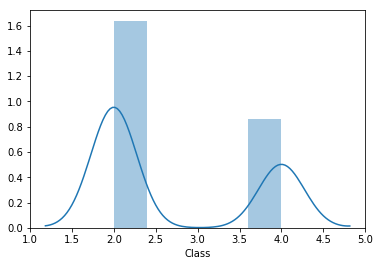

In [353]:
sns.distplot(bc2_df['Class'])

### convert the datatype of Bare Nuclei to `int`

In [355]:
bc2_df_out["Bare Nuclei"].astype(int)

0       1
1      10
2       2
3       4
4       1
5      10
6      10
7       1
9       1
10      1
11      1
12      3
13      3
15      1
16      1
17      1
19      1
22      1
23      1
24      1
25      7
26      1
27      1
28      1
29      1
30      1
31      1
33      1
34      1
35      1
       ..
656     1
659     1
660     1
661     1
663     1
664     1
665     1
667     1
670     8
671     1
672     1
673     1
674     1
675     1
676     1
677     1
678     1
679     1
682     1
683     1
684     1
685     1
686     1
687     1
688     1
690     1
691     5
692     1
694     2
695     1
Name: Bare Nuclei, Length: 491, dtype: int32

### Standardization of Data (Use Standard Scaler)

In [360]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(bc2_df_out))

C:\Users\vs104709\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\vs104709\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [364]:
scaled_data.columns = bc2_df_out.columns

In [366]:
scaled_data.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,-0.274483,0.739422,-0.433243,-0.504081,-0.457329,-0.261860,-0.422865,0.344722,-0.363597,0.0,-0.376644
1,-0.263299,0.739422,1.277659,1.127812,2.507011,4.760533,3.089618,0.344722,0.386512,0.0,-0.376644
2,-0.215499,-0.178546,-0.433243,-0.504081,-0.457329,-0.261860,-0.032589,0.344722,-0.363597,0.0,-0.376644
3,-0.212236,1.198406,3.558862,3.303669,-0.457329,0.742619,0.747963,0.344722,4.137057,0.0,-0.376644
4,-0.209379,0.280438,-0.433243,-0.504081,1.024841,-0.261860,-0.422865,0.344722,-0.363597,0.0,-0.376644
5,-0.208999,2.116374,4.699463,4.391597,4.730266,4.760533,3.089618,4.148283,4.137057,0.0,2.655029
6,-0.205257,-1.096514,-0.433243,-0.504081,-0.457329,-0.261860,3.089618,0.344722,-0.363597,0.0,-0.376644
7,-0.203488,-0.637530,-0.433243,0.039883,-0.457329,-0.261860,-0.422865,0.344722,-0.363597,0.0,-0.376644
8,-0.147886,0.280438,0.137058,-0.504081,-0.457329,-0.261860,-0.422865,-0.289205,-0.363597,0.0,-0.376644
9,-0.139441,-1.096514,-0.433243,-0.504081,-0.457329,-1.266339,-0.422865,0.344722,-0.363597,0.0,-0.376644


### Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them. (Use pd.scatter matrix())

C:\Users\vs104709\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\vs104709\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\vs104709\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\vs104709\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; aut

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002819FEA1518>,
      dtype=object)

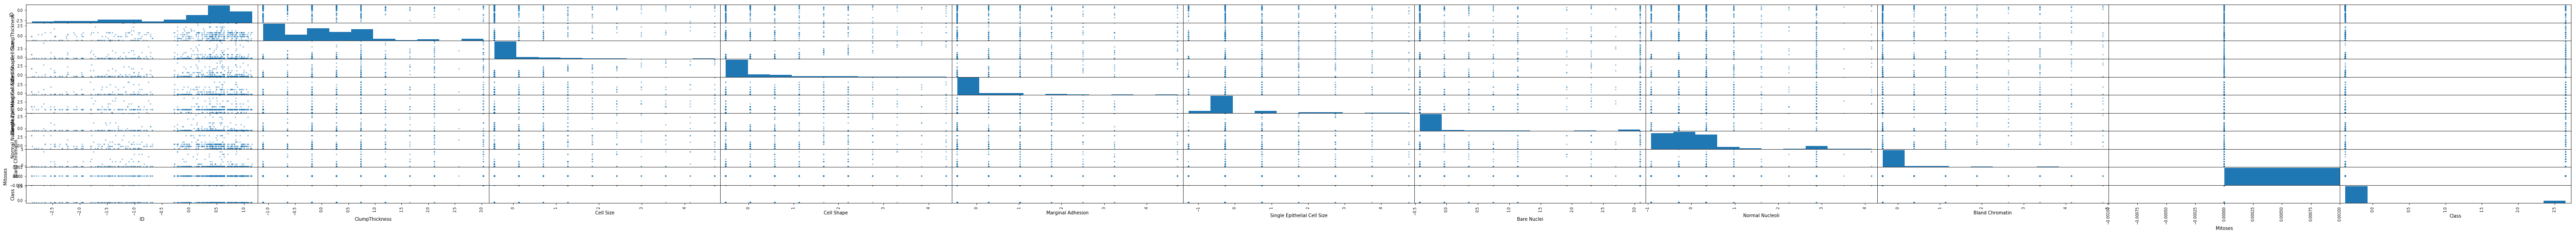

In [367]:
pd.plotting.scatter_matrix(scaled_data, figsize=(100,8))

### Divide the dataset into feature set and target set

In [374]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....

In [369]:
scaled_data.columns

Index(['ID', 'ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

In [393]:
Y=scaled_data['Class'].astype('str')
X=scaled_data[['ID', 'ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion','Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli','Bland Chromatin', 'Mitoses']]

In [396]:
Y.dtype

dtype('O')

### Divide the Training and Test sets in 70:30 

In [399]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.30, random_state=1)

### Model 1 : Implement a default Decision Tree model with no attributes

In [400]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [401]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [403]:
train_char_label = ['No', 'Yes']

In [412]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

Tree_File = open('D:\Medic.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Tree_File.close()


# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                                  Imp
ID                           0.010550
ClumpThickness               0.044771
Cell Size                    0.127311
Cell Shape                   0.000000
Marginal Adhesion            0.000000
Single Epithelial Cell Size  0.034557
Bare Nuclei                  0.759262
Normal Nucleoli              0.000000
Bland Chromatin              0.023549
Mitoses                      0.000000


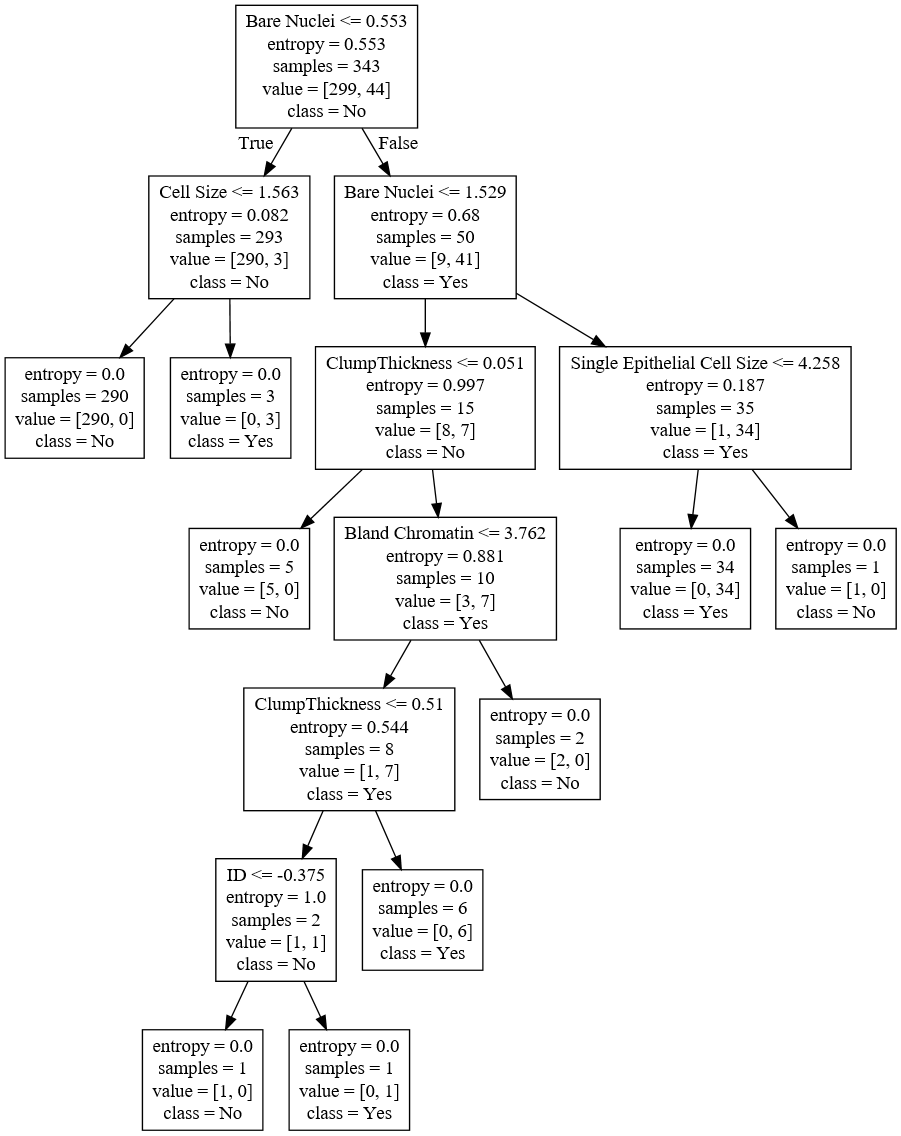

In [420]:

Image("D:\Medic.png")

### Check the feature importances of the Decision Tree model

In [421]:
y_predict = dt_model.predict(X_test)

In [422]:
y_predict

array(['-0.37664368455647745', '-0.37664368455647745',
       '-0.37664368455647745', '-0.37664368455647745',
       '-0.37664368455647745', '-0.37664368455647745',
       '-0.37664368455647745', '-0.37664368455647745',
       '-0.37664368455647745', '-0.37664368455647745',
       '-0.37664368455647745', '-0.37664368455647745',
       '-0.37664368455647745', '-0.37664368455647745',
       '-0.37664368455647745', '-0.37664368455647745',
       '-0.37664368455647745', '-0.37664368455647745',
       '-0.37664368455647745', '-0.37664368455647745',
       '-0.37664368455647745', '2.6550292517915604',
       '-0.37664368455647745', '2.6550292517915604',
       '-0.37664368455647745', '-0.37664368455647745',
       '-0.37664368455647745', '-0.37664368455647745',
       '-0.37664368455647745', '-0.37664368455647745',
       '-0.37664368455647745', '-0.37664368455647745',
       '-0.37664368455647745', '-0.37664368455647745',
       '-0.37664368455647745', '-0.37664368455647745',
       '-0.376

### Check the training & test accuracy of model 1 

In [426]:
print(dt_model.score(X_test , y_test))


0.9324324324324325


In [429]:

# calculate accuracy measures and confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_predict , y_test))

[[128   7]
 [  3  10]]


### Model 2: Implement a decision tree with depth of the tree = 10 and leaf nodes = 5

In [432]:
dt_model_1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=10 )
dt_model_1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [433]:

Tree_File = open('D:\Medic_1.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Tree_File.close()


# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model_1.feature_importances_, columns = ["Imp"], index = X_train.columns))


                                  Imp
ID                           0.000000
ClumpThickness               0.159694
Cell Size                    0.010550
Cell Shape                   0.000000
Marginal Adhesion            0.000000
Single Epithelial Cell Size  0.046945
Bare Nuclei                  0.759262
Normal Nucleoli              0.000000
Bland Chromatin              0.023549
Mitoses                      0.000000


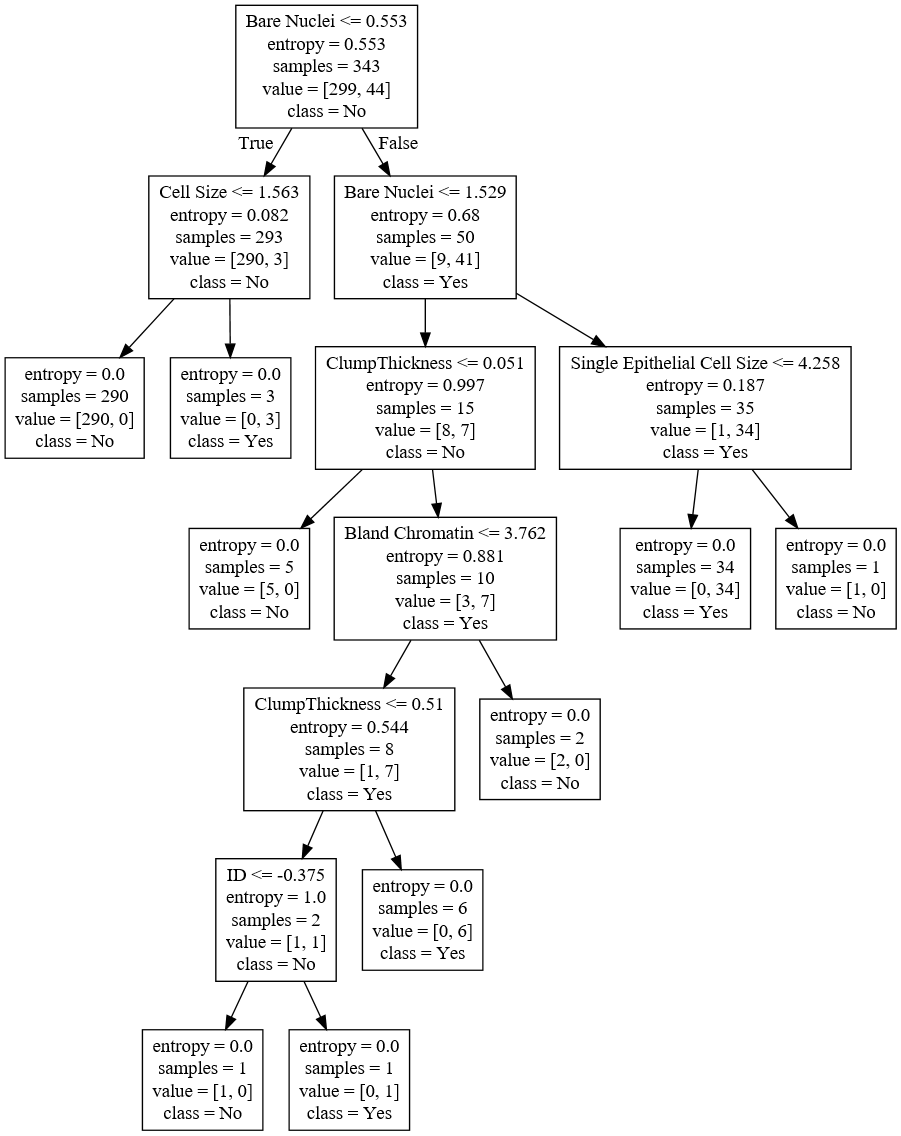

In [434]:
Image("D:\Medic_1.png")

### Check the training & test accuracy of model 2

In [437]:
print(dt_model_1.score(X_test,y_test))


0.9324324324324325


In [438]:
y_predict = dt_model_1.predict(X_test)

### Print the confusion matrix of model 1 and model 2

In [439]:
print(metrics.confusion_matrix(y_predict , y_test))

[[128   7]
 [  3  10]]
